In [1]:
import GCRCatalogs
from matplotlib.pyplot import figure
from GCRCatalogs.dc2_object import DC2ObjectParquetCatalog
import astropy.units as u
import matplotlib.pyplot as plt

In [2]:
pq_path = '/global/cfs/cdirs/lsst/shared/rubin/DP0.2/objectTable/'

In [3]:
gc_dp0 = DC2ObjectParquetCatalog(base_dir=pq_path, 
                                     filename_pattern='objectTable_tract_\d+\_DC2_2_2i_runs_DP0_2_v23_0_1_PREOPS-905_step3_\d+_\w+Z.parq$')

/global/common/software/lsst/common/miniconda/dp-v0.0.42-d/lib/python3.8/site-packages/GCR/base.py:381: UserWarning: Native quantity `i_base_SdssShape_psf_xx` does not exist (required by `psf_fwhm_i`, `IxxPSF_pixel_i`)
  warnings.warn(msg)


In [4]:
gc_dr6 = GCRCatalogs.load_catalog('dc2_object_run2.2i_dr6')


In [5]:
qtys_dp0 = ['coord_ra', 'coord_dec', 'i_free_cModelFlux', 
            'r_free_cModelFlux', 'i_free_cModelFluxErr', 'r_free_cModelFluxErr',
            'i_cModelFlux', 'r_cModelFlux', 'i_cModelFluxErr', 'r_cModelFluxErr',
            'detect_isPrimary',
            'g_free_cModelFlux','g_free_cModelFluxErr', 'g_cModelFlux','g_cModelFluxErr',
            'u_free_cModelFlux','u_free_cModelFluxErr', 'u_cModelFlux','u_cModelFluxErr',
            'z_free_cModelFlux','z_free_cModelFluxErr', 'z_cModelFlux','z_cModelFluxErr',
            'y_free_cModelFlux','y_free_cModelFluxErr', 'y_cModelFlux','y_cModelFluxErr',
           ]

In [6]:
qtys_dr6 = ['ra', 'dec', 'i_modelfit_CModel_instFlux', 'i_modelfit_CModel_instFluxErr', 
            'r_modelfit_CModel_instFlux', 'r_modelfit_CModel_instFluxErr', 'mag_i_cModel', 'mag_r_cModel',
           'g_modelfit_CModel_instFlux', 'g_modelfit_CModel_instFluxErr', 'mag_g_cModel',
           'u_modelfit_CModel_instFlux', 'u_modelfit_CModel_instFluxErr', 'mag_u_cModel',
           'z_modelfit_CModel_instFlux', 'z_modelfit_CModel_instFluxErr', 'mag_z_cModel',
            'y_modelfit_CModel_instFlux', 'y_modelfit_CModel_instFluxErr', 'mag_y_cModel'
           ]

In [7]:
data_dp0 = gc_dp0.get_quantities(qtys_dp0, native_filters='(tract > 4029) & (tract < 4033)')

In [8]:
data_dr6 = gc_dr6.get_quantities(qtys_dr6, native_filters='(tract > 4029) & (tract < 4033)')


/global/common/software/lsst/common/miniconda/dp-v0.0.42-d/lib/python3.8/site-packages/GCRCatalogs/dc2_dm_catalog.py:43: RuntimeWarning: divide by zero encountered in log10
  return -2.5 * np.log10(flux) + AB_mag_zp_wrt_nanoJansky
/global/common/software/lsst/common/miniconda/dp-v0.0.42-d/lib/python3.8/site-packages/GCRCatalogs/dc2_dm_catalog.py:43: RuntimeWarning: invalid value encountered in log10
  return -2.5 * np.log10(flux) + AB_mag_zp_wrt_nanoJansky
/global/common/software/lsst/common/miniconda/dp-v0.0.42-d/lib/python3.8/site-packages/GCRCatalogs/dc2_dm_catalog.py:43: RuntimeWarning: divide by zero encountered in log10
  return -2.5 * np.log10(flux) + AB_mag_zp_wrt_nanoJansky
/global/common/software/lsst/common/miniconda/dp-v0.0.42-d/lib/python3.8/site-packages/GCRCatalogs/dc2_dm_catalog.py:43: RuntimeWarning: invalid value encountered in log10
  return -2.5 * np.log10(flux) + AB_mag_zp_wrt_nanoJansky
/global/common/software/lsst/common/miniconda/dp-v0.0.42-d/lib/python3.8/site-

In [10]:
primary = data_dp0['detect_isPrimary']
mag_i = ((data_dp0['i_cModelFlux'][primary])*u.nJy).to(u.ABmag).value
mag_r = ((data_dp0['r_cModelFlux'][primary])*u.nJy).to(u.ABmag).value
mag_g = ((data_dp0['g_cModelFlux'][primary])*u.nJy).to(u.ABmag).value
mag_u = ((data_dp0['u_cModelFlux'][primary])*u.nJy).to(u.ABmag).value
mag_z = ((data_dp0['z_cModelFlux'][primary])*u.nJy).to(u.ABmag).value
mag_y = ((data_dp0['y_cModelFlux'][primary])*u.nJy).to(u.ABmag).value
mag_i_err = ((data_dp0['i_cModelFluxErr'][primary])*u.nJy).to(u.ABmag).value
mag_r_err = ((data_dp0['r_cModelFluxErr'][primary])*u.nJy).to(u.ABmag).value
mag_g_err = ((data_dp0['g_cModelFluxErr'][primary])*u.nJy).to(u.ABmag).value
mag_u_err = ((data_dp0['u_cModelFluxErr'][primary])*u.nJy).to(u.ABmag).value
mag_z_err = ((data_dp0['z_cModelFluxErr'][primary])*u.nJy).to(u.ABmag).value
mag_y_err = ((data_dp0['y_cModelFluxErr'][primary])*u.nJy).to(u.ABmag).value

/tmp/ipykernel_38110/2877510780.py:4: RuntimeWarning: invalid value encountered in subtract
  axs[0][0].hist2d(mag_i, mag_i - mag_u,range=((15,30),(-4,4)),bins=(100,100), label='DP0.2')
/tmp/ipykernel_38110/2877510780.py:7: RuntimeWarning: invalid value encountered in subtract
  axs[0][1].hist2d(data_dr6['mag_i_cModel'], data_dr6['mag_i_cModel'] - data_dr6['mag_u_cModel'],range=((15,30),(-4,4)),bins=(100,100), label='DR6')
/tmp/ipykernel_38110/2877510780.py:14: RuntimeWarning: invalid value encountered in subtract
  axs[0][3].hist2d(data_dr6['mag_r_cModel'], data_dr6['mag_r_cModel'] - data_dr6['mag_g_cModel'],range=((15,30),(-4,4)),bins=(100,100), label='DR6')
/tmp/ipykernel_38110/2877510780.py:18: RuntimeWarning: invalid value encountered in subtract
  axs[1][0].hist2d(mag_z, mag_z - mag_i,range=((15,30),(-4,4)),bins=(100,100), label='DP0.2')
/tmp/ipykernel_38110/2877510780.py:21: RuntimeWarning: invalid value encountered in subtract
  axs[1][1].hist2d(data_dr6['mag_z_cModel'], data_d

(array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   1., ...,  96.,  86.,  62.],
        [  0.,   0.,   0., ..., 123.,  84., 100.],
        [  1.,   0.,   1., ..., 138., 109.,  98.]]),
 array([15.  , 15.15, 15.3 , 15.45, 15.6 , 15.75, 15.9 , 16.05, 16.2 ,
        16.35, 16.5 , 16.65, 16.8 , 16.95, 17.1 , 17.25, 17.4 , 17.55,
        17.7 , 17.85, 18.  , 18.15, 18.3 , 18.45, 18.6 , 18.75, 18.9 ,
        19.05, 19.2 , 19.35, 19.5 , 19.65, 19.8 , 19.95, 20.1 , 20.25,
        20.4 , 20.55, 20.7 , 20.85, 21.  , 21.15, 21.3 , 21.45, 21.6 ,
        21.75, 21.9 , 22.05, 22.2 , 22.35, 22.5 , 22.65, 22.8 , 22.95,
        23.1 , 23.25, 23.4 , 23.55, 23.7 , 23.85, 24.  , 24.15, 24.3 ,
        24.45, 24.6 , 24.75, 24.9 , 25.05, 25.2 , 25.35, 25.5 , 25.65,
        25.8 , 25.95, 26.1 , 26.25, 26.4 , 26.55, 26.7 , 26.85, 27.  ,
        27.15, 27.3 , 27.45, 27.6 , 27.7

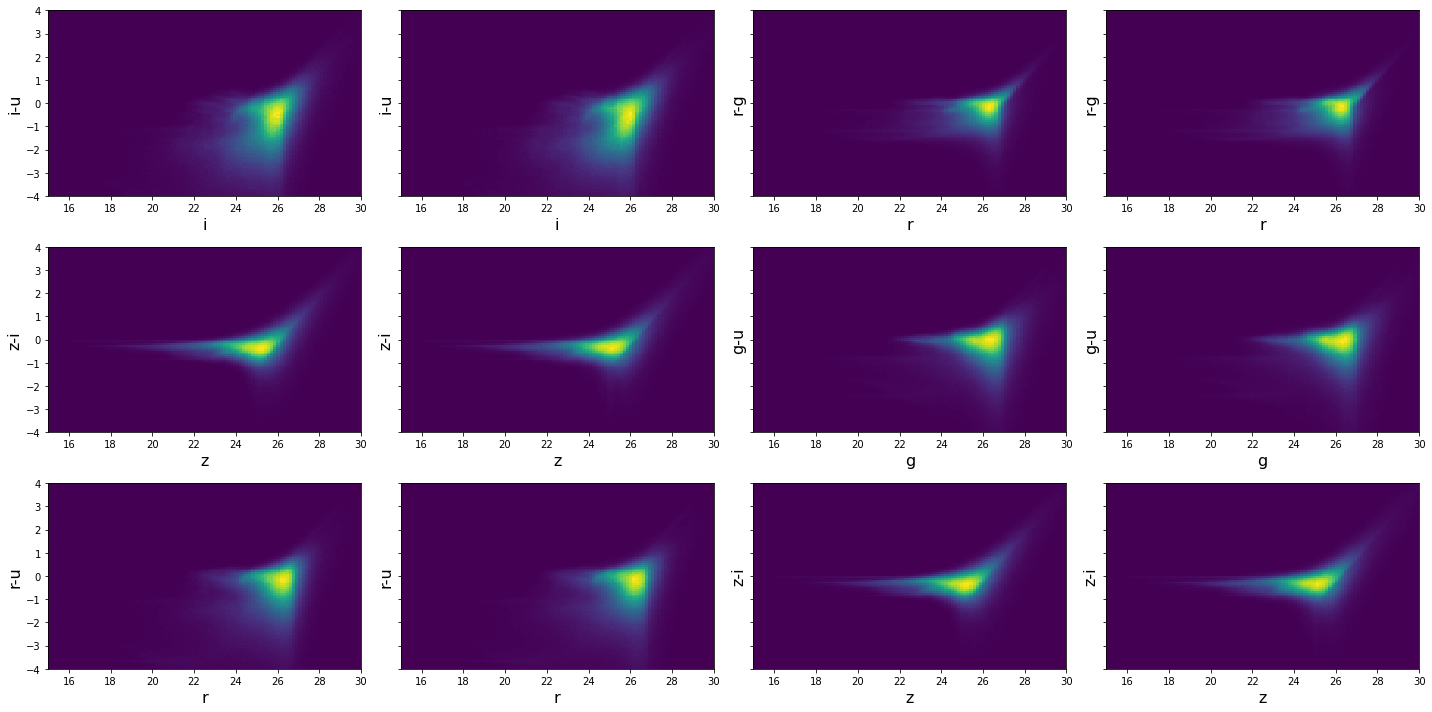

In [22]:
fig, axs = plt.subplots(3,4, sharey=True, tight_layout=True,figsize=(20, 10))
axs[0][0].set_xlabel('i', fontsize=16)
axs[0][0].set_ylabel('i-u', fontsize=16)
axs[0][0].hist2d(mag_i, mag_i - mag_u,range=((15,30),(-4,4)),bins=(100,100), label='DP0.2')
axs[0][1].set_xlabel('i', fontsize=16)
axs[0][1].set_ylabel('i-u', fontsize=16)
axs[0][1].hist2d(data_dr6['mag_i_cModel'], data_dr6['mag_i_cModel'] - data_dr6['mag_u_cModel'],range=((15,30),(-4,4)),bins=(100,100), label='DR6')

axs[0][2].set_xlabel('r', fontsize=16)
axs[0][2].set_ylabel('r-g', fontsize=16)
axs[0][2].hist2d(mag_r, mag_r - mag_g,range=((15,30),(-4,4)),bins=(100,100), label='DP0.2')
axs[0][3].set_xlabel('r', fontsize=16)
axs[0][3].set_ylabel('r-g', fontsize=16)
axs[0][3].hist2d(data_dr6['mag_r_cModel'], data_dr6['mag_r_cModel'] - data_dr6['mag_g_cModel'],range=((15,30),(-4,4)),bins=(100,100), label='DR6')

axs[1][0].set_xlabel('z', fontsize=16)
axs[1][0].set_ylabel('z-i', fontsize=16)
axs[1][0].hist2d(mag_z, mag_z - mag_i,range=((15,30),(-4,4)),bins=(100,100), label='DP0.2')
axs[1][1].set_xlabel('z', fontsize=16)
axs[1][1].set_ylabel('z-i', fontsize=16)
axs[1][1].hist2d(data_dr6['mag_z_cModel'], data_dr6['mag_z_cModel'] - data_dr6['mag_i_cModel'],range=((15,30),(-4,4)),bins=(100,100), label='DR6')

axs[1][2].set_xlabel('g', fontsize=16)
axs[1][2].set_ylabel('g-u', fontsize=16)
axs[1][2].hist2d(mag_g, mag_g - mag_u,range=((15,30),(-4,4)),bins=(100,100), label='DP0.2')
axs[1][3].set_xlabel('g', fontsize=16)
axs[1][3].set_ylabel('g-u', fontsize=16)
axs[1][3].hist2d(data_dr6['mag_g_cModel'], data_dr6['mag_g_cModel'] - data_dr6['mag_u_cModel'],range=((15,30),(-4,4)),bins=(100,100), label='DR6')

axs[2][0].set_xlabel('r', fontsize=16)
axs[2][0].set_ylabel('r-u', fontsize=16)
axs[2][0].hist2d(mag_r, mag_r - mag_u,range=((15,30),(-4,4)),bins=(100,100), label='DP0.2')
axs[2][1].set_xlabel('r', fontsize=16)
axs[2][1].set_ylabel('r-u', fontsize=16)
axs[2][1].hist2d(data_dr6['mag_r_cModel'], data_dr6['mag_r_cModel'] - data_dr6['mag_u_cModel'],range=((15,30),(-4,4)),bins=(100,100), label='DR6')

axs[2][0].set_xlabel('r', fontsize=16)
axs[2][0].set_ylabel('r-u', fontsize=16)
axs[2][0].hist2d(mag_r, mag_r - mag_u,range=((15,30),(-4,4)),bins=(100,100), label='DP0.2')
axs[2][1].set_xlabel('r', fontsize=16)
axs[2][1].set_ylabel('r-u', fontsize=16)
axs[2][1].hist2d(data_dr6['mag_r_cModel'], data_dr6['mag_r_cModel'] - data_dr6['mag_u_cModel'],range=((15,30),(-4,4)),bins=(100,100), label='DR6')


axs[2][2].set_xlabel('z', fontsize=16)
axs[2][2].set_ylabel('z-i', fontsize=16)
axs[2][2].hist2d(mag_z, mag_z - mag_i,range=((15,30),(-4,4)),bins=(100,100), label='DP0.2')
axs[2][3].set_xlabel('z', fontsize=16)
axs[2][3].set_ylabel('z-i', fontsize=16)
axs[2][3].hist2d(data_dr6['mag_z_cModel'], data_dr6['mag_z_cModel'] - data_dr6['mag_i_cModel'],range=((15,30),(-4,4)),bins=(100,100), label='DR6')